# Coarse alignment with RANSAC
We are going to compute sparse correspondences using off-the-shelf deep feature detector and RANSAC to estimate a homography. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from skimage.io import imread
from ransacflow.model import CoarseAlignment
from ransacflow.util import get_data_root
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

/home/andy/.conda/envs/ransacflow/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


Path and parameters

In [3]:
data_dir = get_data_root() / "quick_start"
I_1 = imread(data_dir / "ArtMiner_Detail_Res13_10.png")
I_2 = imread(data_dir / "ArtMiner_Detail_Res13_11.png")

# ignore alpha mask
I_1 = I_1[..., :-1]
I_2 = I_2[..., :-1]


### Without alignment

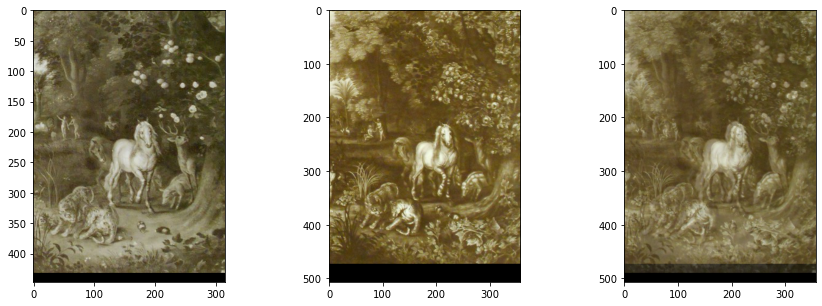

In [4]:
from skimage.transform import resize

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I_1);
ax[1].imshow(I_2);

I_12 = resize(I_1, I_2.shape, preserve_range=True) * 0.5 + I_2 * 0.5
I_12 = I_12.astype(np.uint8)

ax[2].imshow(I_12);

### Coarse alignment

In [34]:
%%time

import kornia as K

device = torch.device("cuda")

coarse_model = CoarseAlignment(n_scales=7, scale_ratio=1.2, use_moco=False)
coarse_model.to(device)

I_1t = K.utils.image_to_tensor(I_1).float().to(device)
I_2t = K.utils.image_to_tensor(I_2).float().to(device)

I_1t_reg = coarse_model(I_1t, I_2t)

I_1t = K.utils.tensor_to_image(I_1t).astype(np.uint8)
I_2t = K.utils.tensor_to_image(I_2t).astype(np.uint8)
I_1t_reg = K.utils.tensor_to_image(I_1t_reg).astype(np.uint8)

CPU times: user 1.99 s, sys: 139 ms, total: 2.13 s
Wall time: 822 ms


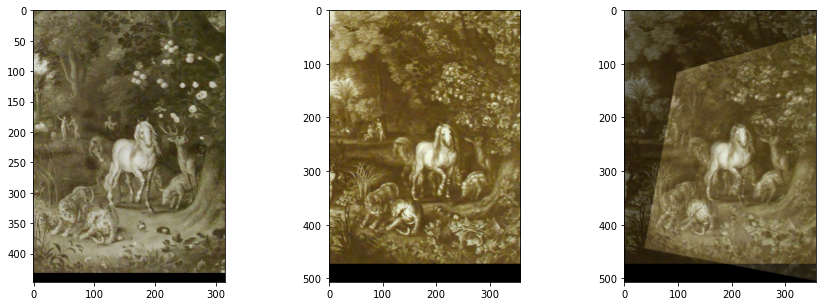

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I_1t);
ax[1].imshow(I_2t);

I_12t = resize(I_1t_reg, I_2t.shape, preserve_range=True) * 0.5 + I_2t * 0.5
I_12t = I_12t.astype(np.uint8)

ax[2].imshow(I_12t);